In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

### import file

In [2]:
toyota=pd.read_csv('ToyotaCorolla.csv', header=0,encoding='unicode_escape')
toyota

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [3]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

### Selection of given columns

In [4]:
toyo=pd.concat([toyota.iloc[:,2:4],toyota.iloc[:,6:7],toyota.iloc[:,8:9],toyota.iloc[:,12:14],toyota.iloc[:,15:18]],axis=1)
toyo

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [5]:
toyo=toyo.rename({'Age_08_04':'age','Quarterly_Tax':'quarter'},axis=1)
toyo

,Price,age,KM,HP,cc,Doors,Gears,quarter,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [6]:
toyo.isna().sum()

Price      0
age        0
KM         0
HP         0
cc         0
Doors      0
Gears      0
quarter    0
Weight     0
dtype: int64

In [7]:
toyo[toyo.duplicated()]

,Price,age,KM,HP,cc,Doors,Gears,quarter,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [8]:
toyo1=toyo.drop_duplicates().reset_index(drop=True)
toyo1

,Price,age,KM,HP,cc,Doors,Gears,quarter,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


### Correlation

In [9]:
toyo1.corr()

,Price,age,KM,HP,cc,Doors,Gears,quarter,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
quarter,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


### Scatter plot b.w variables and histogram

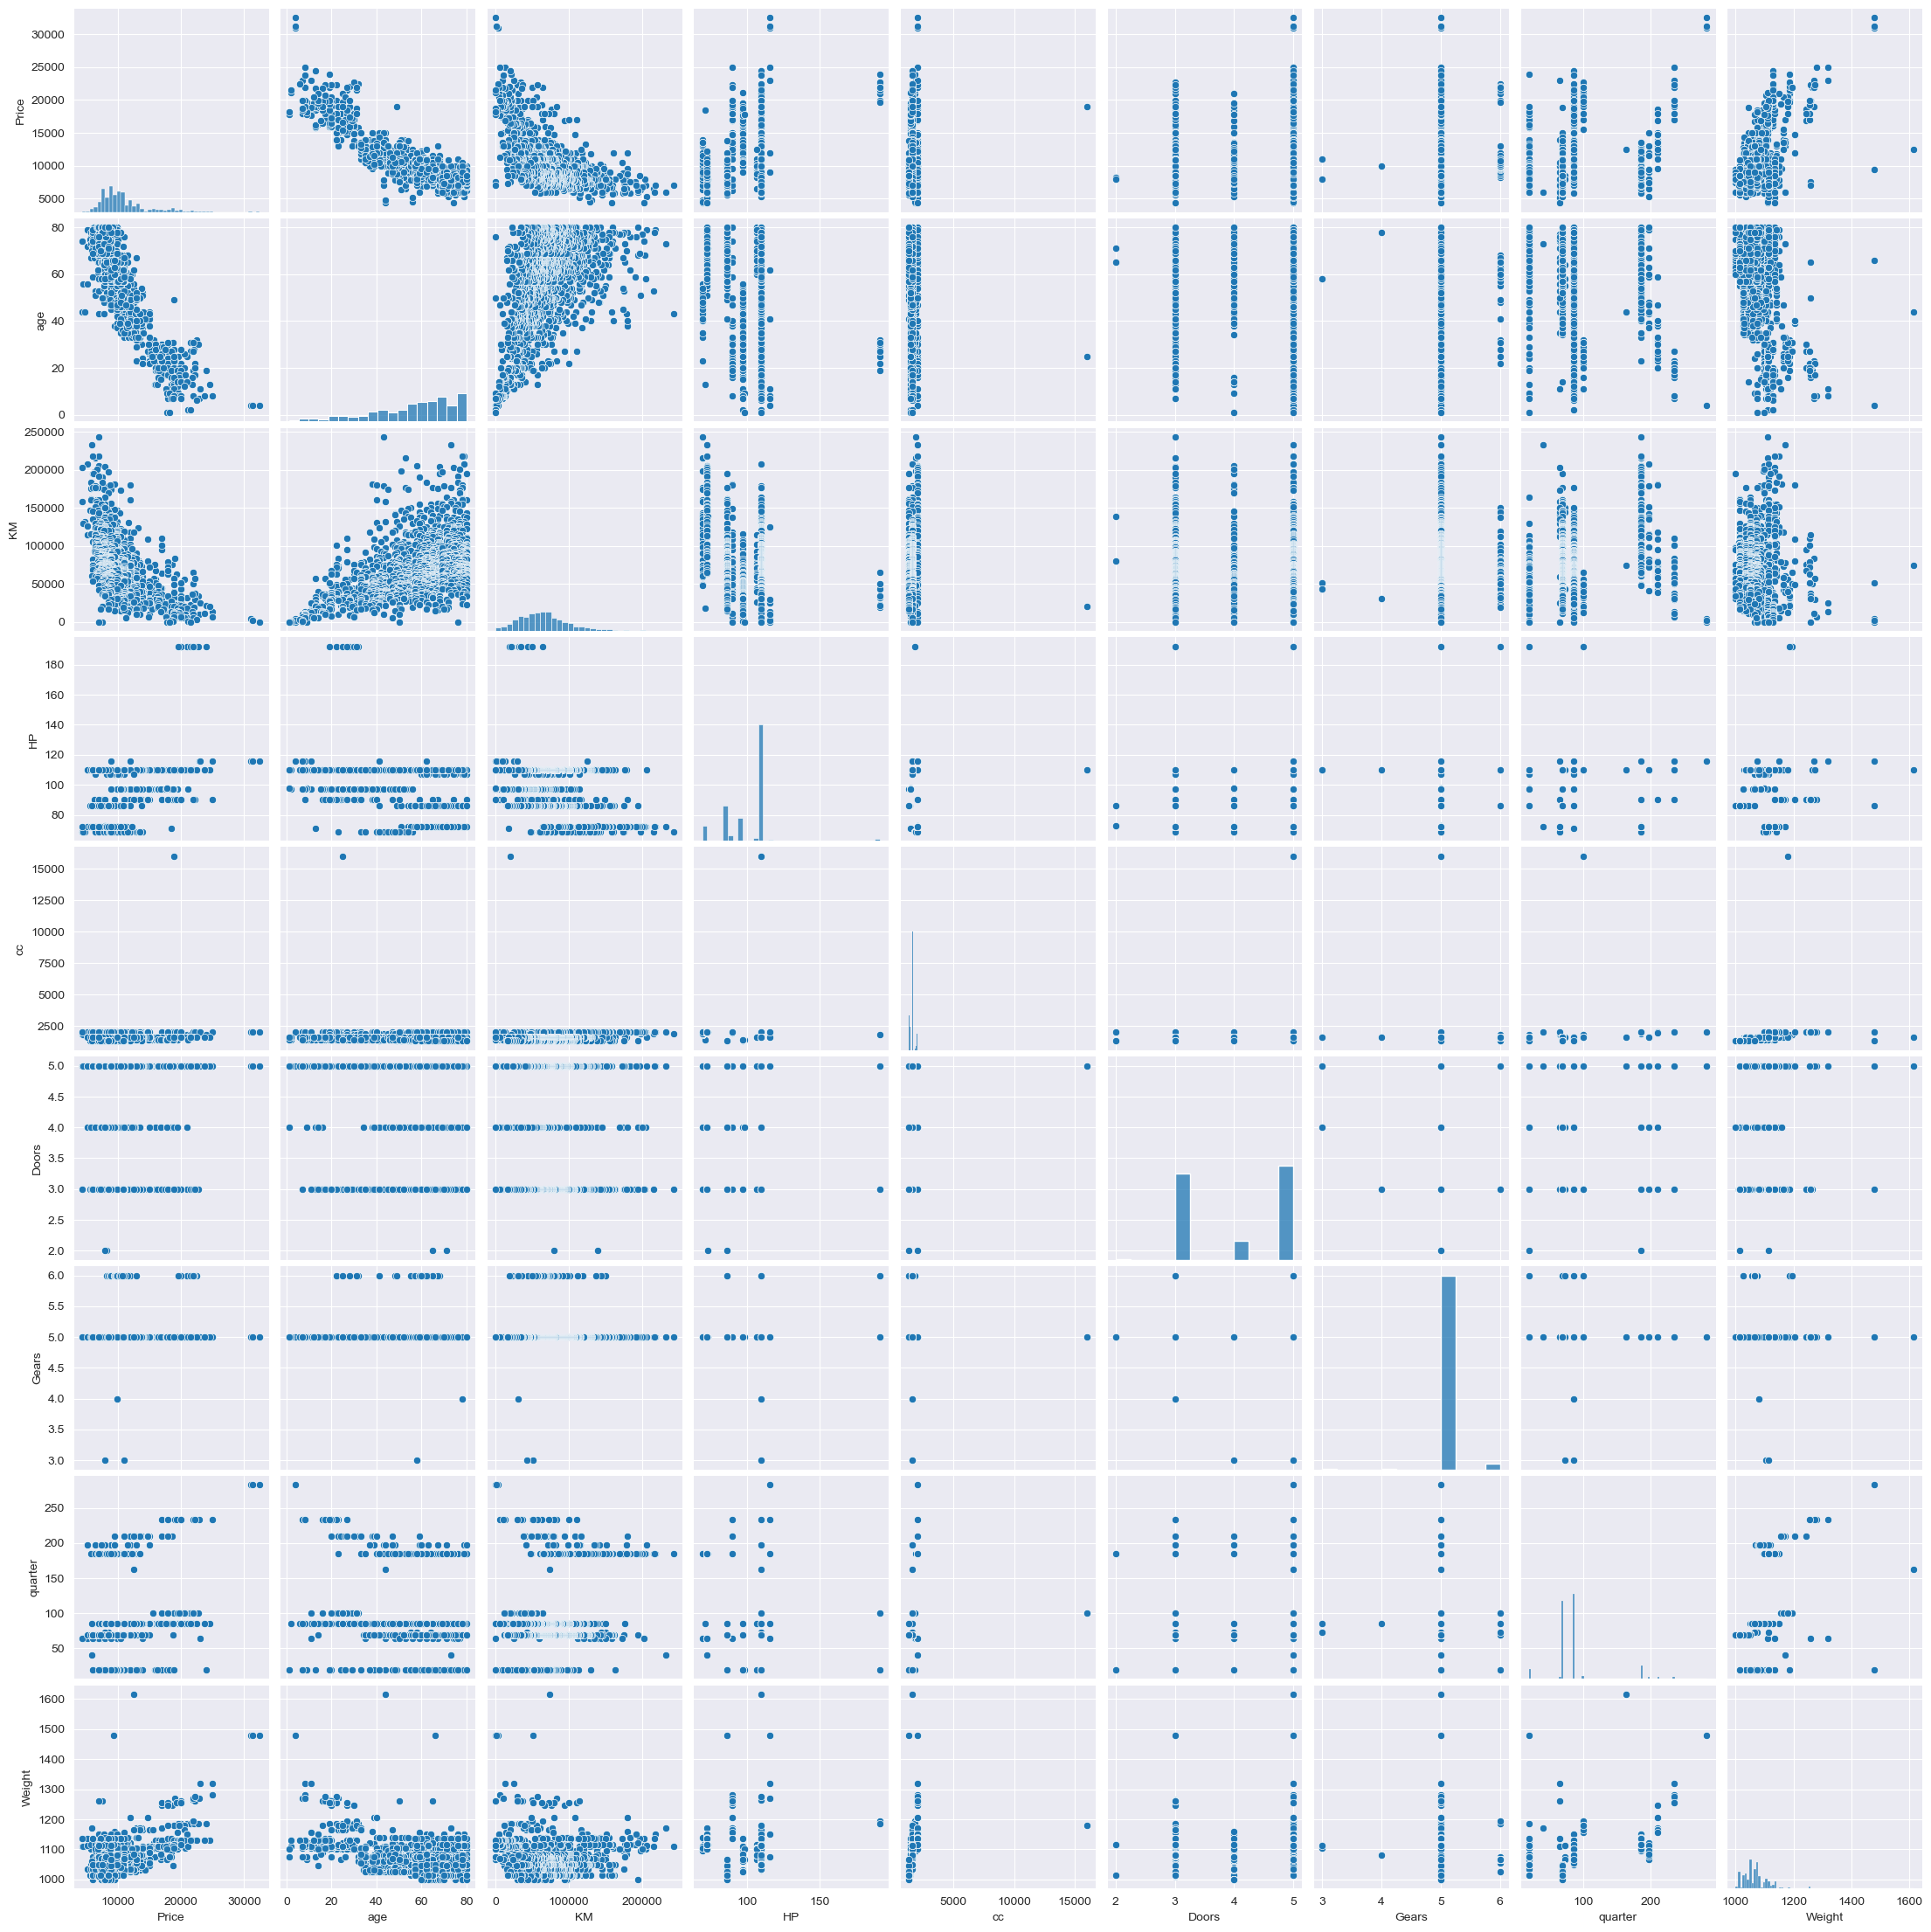

In [10]:
sns.set_style(style='darkgrid')
sns.pairplot(toyo1)

### Building model

In [11]:
import statsmodels.formula.api as smf
model=smf.ols('Price~age+KM+HP+cc+Doors+Gears+quarter+Weight',data=toyo1).fit()

In [12]:
np.round(model.pvalues,5)

Intercept    0.00011
age          0.00000
KM           0.00000
HP           0.00000
cc           0.18824
Doors        0.98164
Gears        0.00245
quarter      0.00329
Weight       0.00000
dtype: float64

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Sun, 25 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:31:17   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
quarter        3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
model.rsquared

0.8625200256947

### Simple linear models 

In [15]:
import statsmodels.formula.api as smf
slr1=smf.ols('Price~cc',data=toyo1).fit()

In [16]:
slr1.pvalues

Intercept    7.236022e-114
cc            2.292856e-06
dtype: float64

In [17]:
import statsmodels.formula.api as smf
slr2=smf.ols('Price~Doors',data=toyo1).fit()

In [18]:
slr2.pvalues

Intercept    8.976407e-75
Doors        2.404166e-12
dtype: float64

In [19]:
import statsmodels.formula.api as smf
mlr=smf.ols('Price~cc+Doors',data=toyo1).fit()

In [20]:
mlr.pvalues

Intercept    1.580945e-35
cc           2.101878e-05
Doors        2.109558e-11
dtype: float64

### calculating VIF values

In [21]:
rsq_age=smf.ols('age~KM+HP+cc+Doors+Gears+quarter+Weight',data=toyo1).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~age+HP+cc+Doors+Gears+quarter+Weight',data=toyo1).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~age+KM+cc+Doors+Gears+quarter+Weight',data=toyo1).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_cc=smf.ols('cc~age+KM+HP+Doors+Gears+quarter+Weight',data=toyo1).fit().rsquared
vif_cc=1/(1-rsq_cc)

rsq_Doors=smf.ols('Doors~age+KM+HP+cc+Gears+quarter+Weight',data=toyo1).fit().rsquared
vif_Doors=1/(1-rsq_Doors)

rsq_Gears=smf.ols('Gears~age+KM+HP+cc+Doors+quarter+Weight',data=toyo1).fit().rsquared
vif_Gears=1/(1-rsq_Gears)

rsq_quarter=smf.ols('quarter~age+KM+HP+cc+Doors+Gears+Weight',data=toyo1).fit().rsquared
vif_quarter=1/(1-rsq_quarter)

rsq_Weight=smf.ols('Weight~age+KM+HP+cc+Doors+Gears+quarter',data=toyo1).fit().rsquared
vif_Weight=1/(1-rsq_Weight)


# Storing vif values in a data frame
d1 = {'Variables':['age','KM','HP','cc','Doors','Gears','quarter','Weight'],'VIF':[vif_age,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_quarter,vif_Weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame 


,Variables,VIF
0,age,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,quarter,2.295375
7,Weight,2.487180


### Model validation techniques or residual analysis

In [22]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

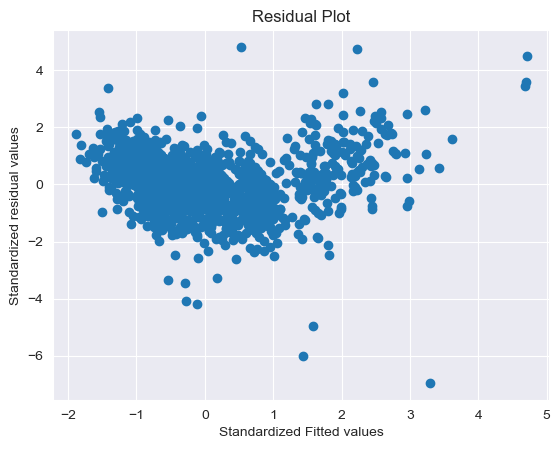

In [23]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

### Q-Q plot

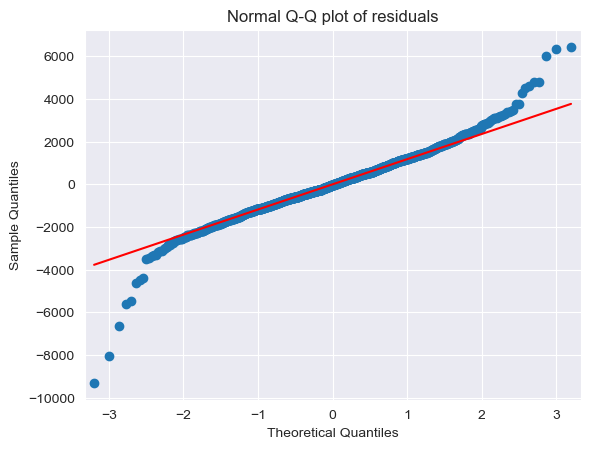

In [24]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

### Residuals-regressors

eval_env: 1


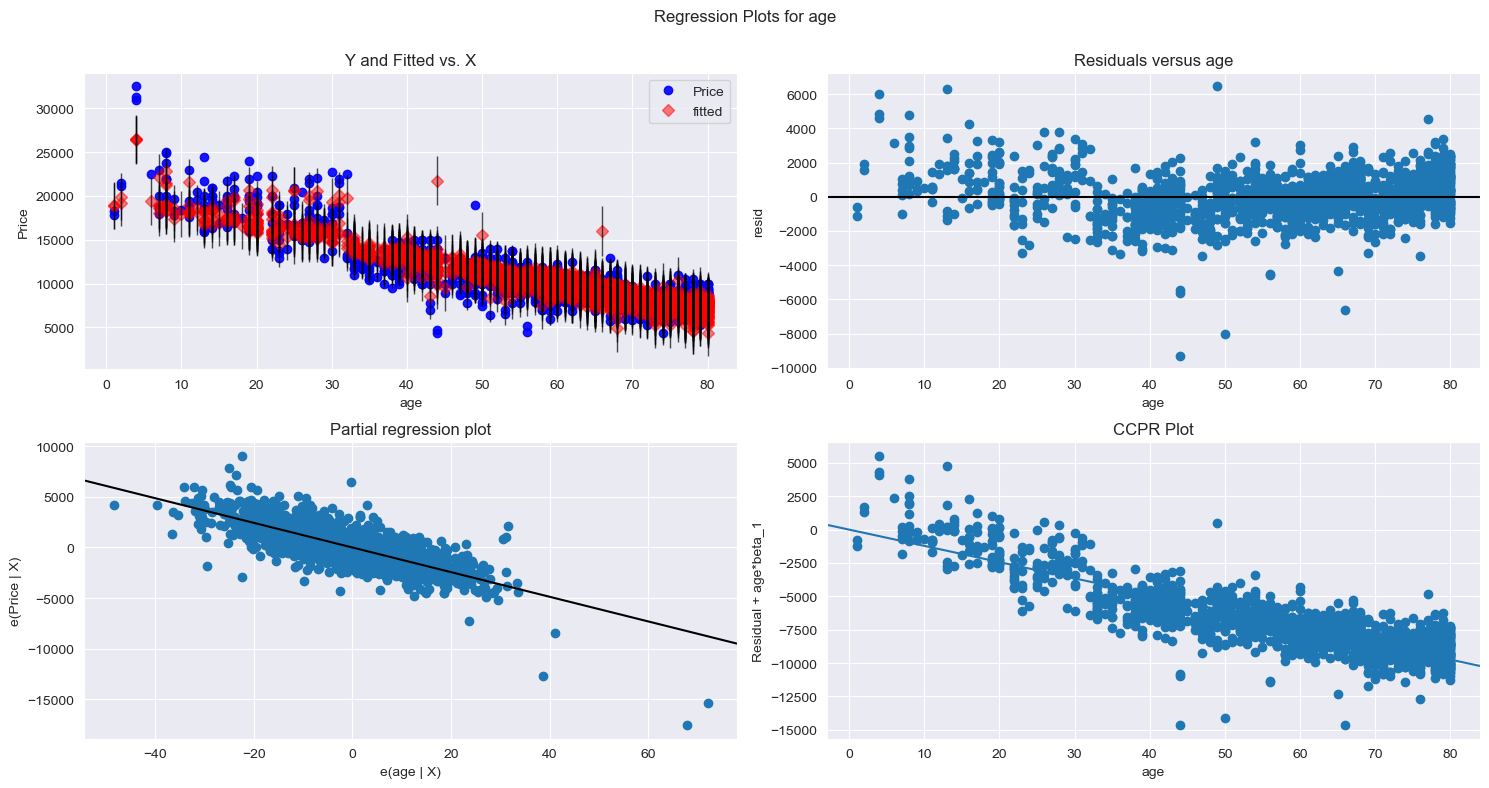

In [25]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "age", fig=fig)
plt.show()

eval_env: 1


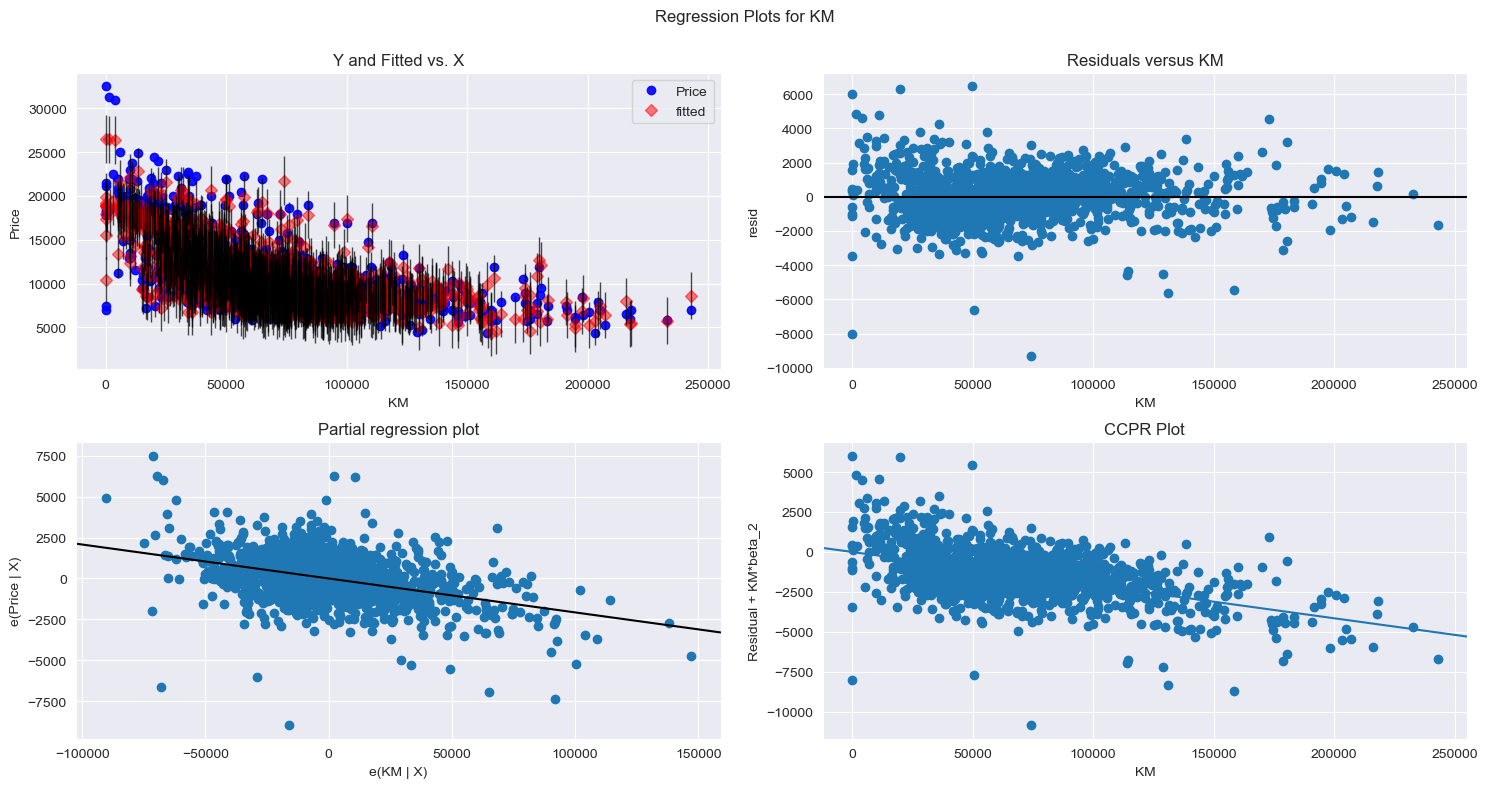

In [26]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show() 

eval_env: 1


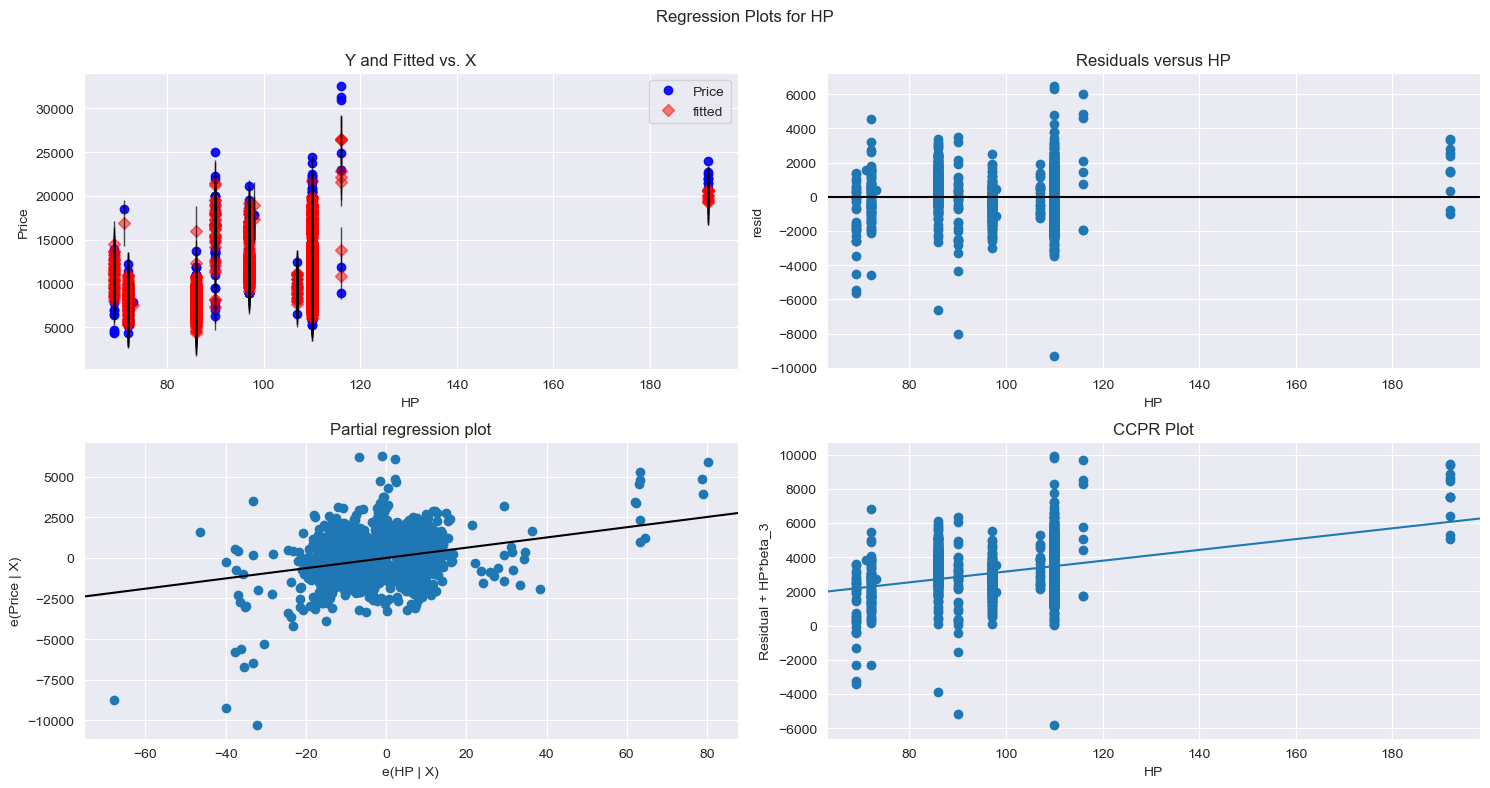

In [27]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

eval_env: 1


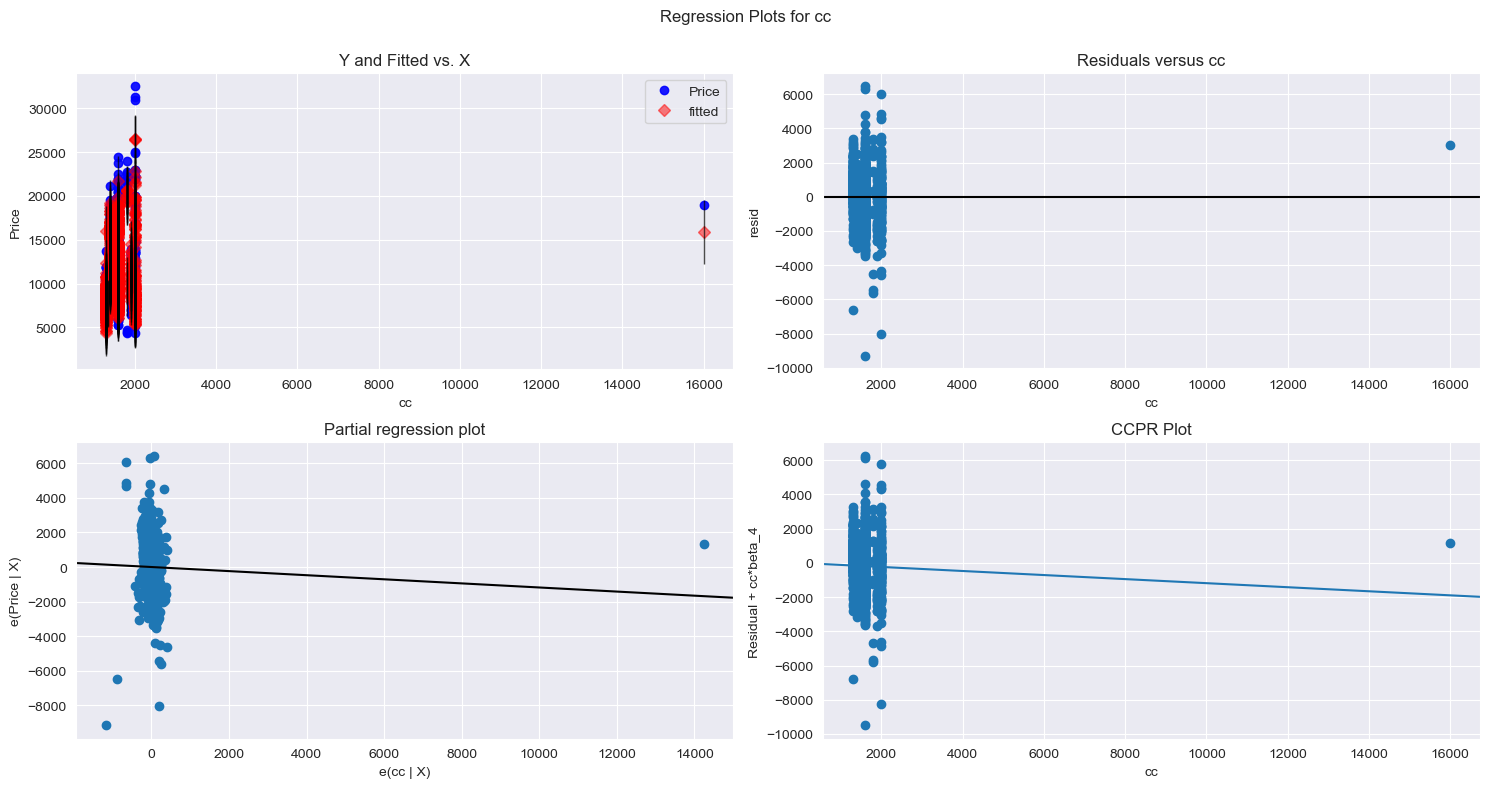

In [28]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

eval_env: 1


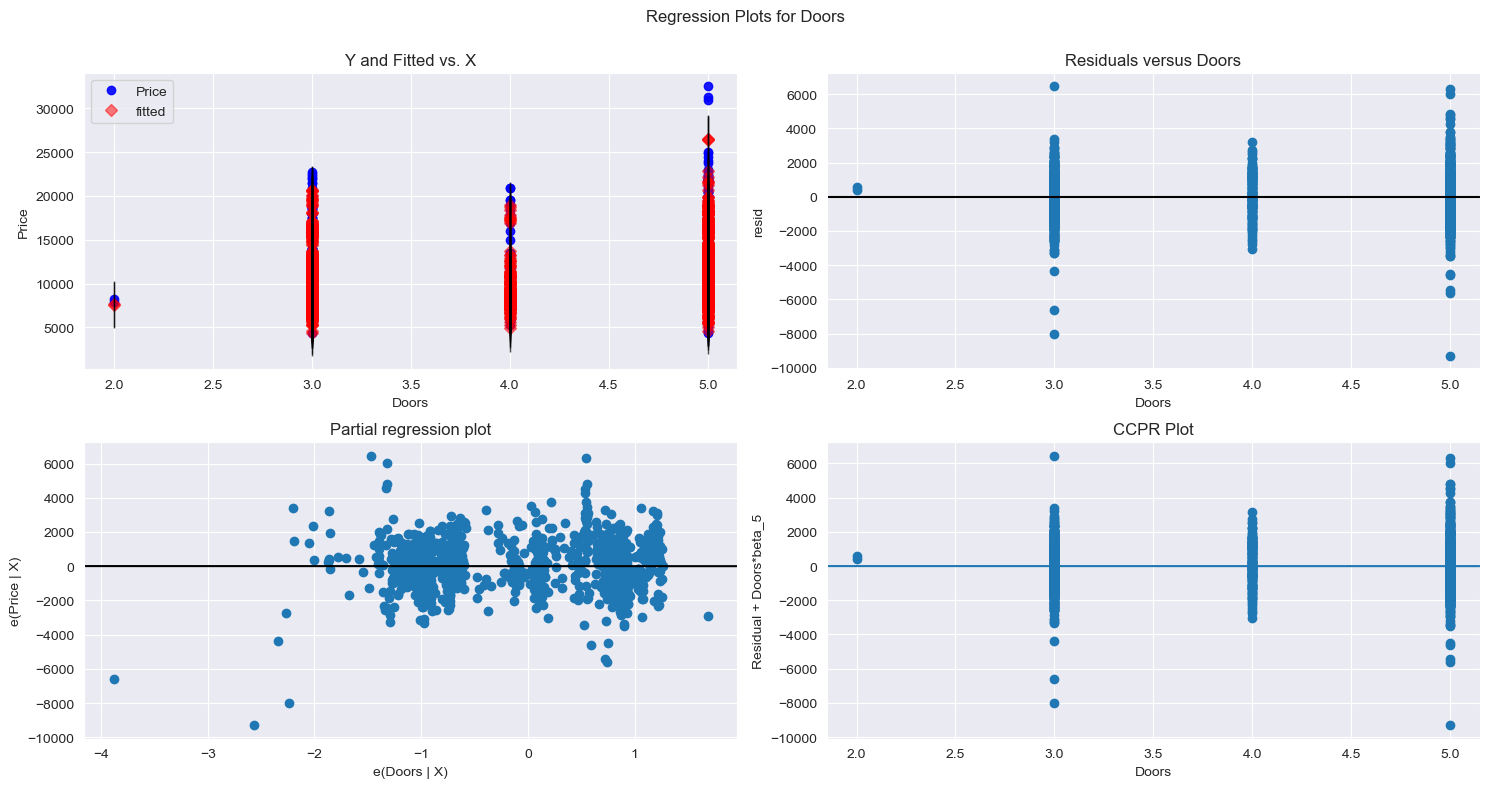

In [29]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

eval_env: 1


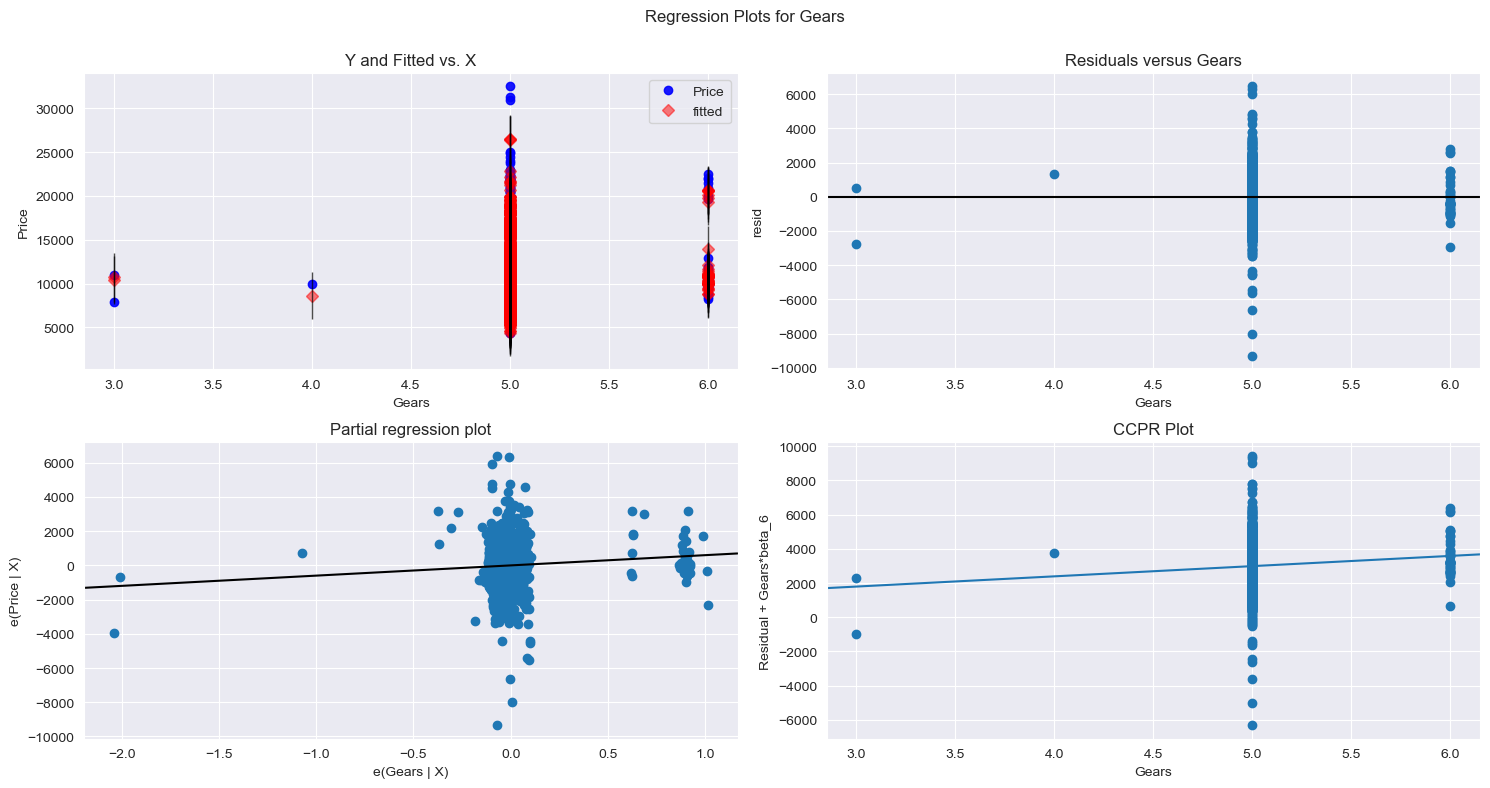

In [30]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

eval_env: 1


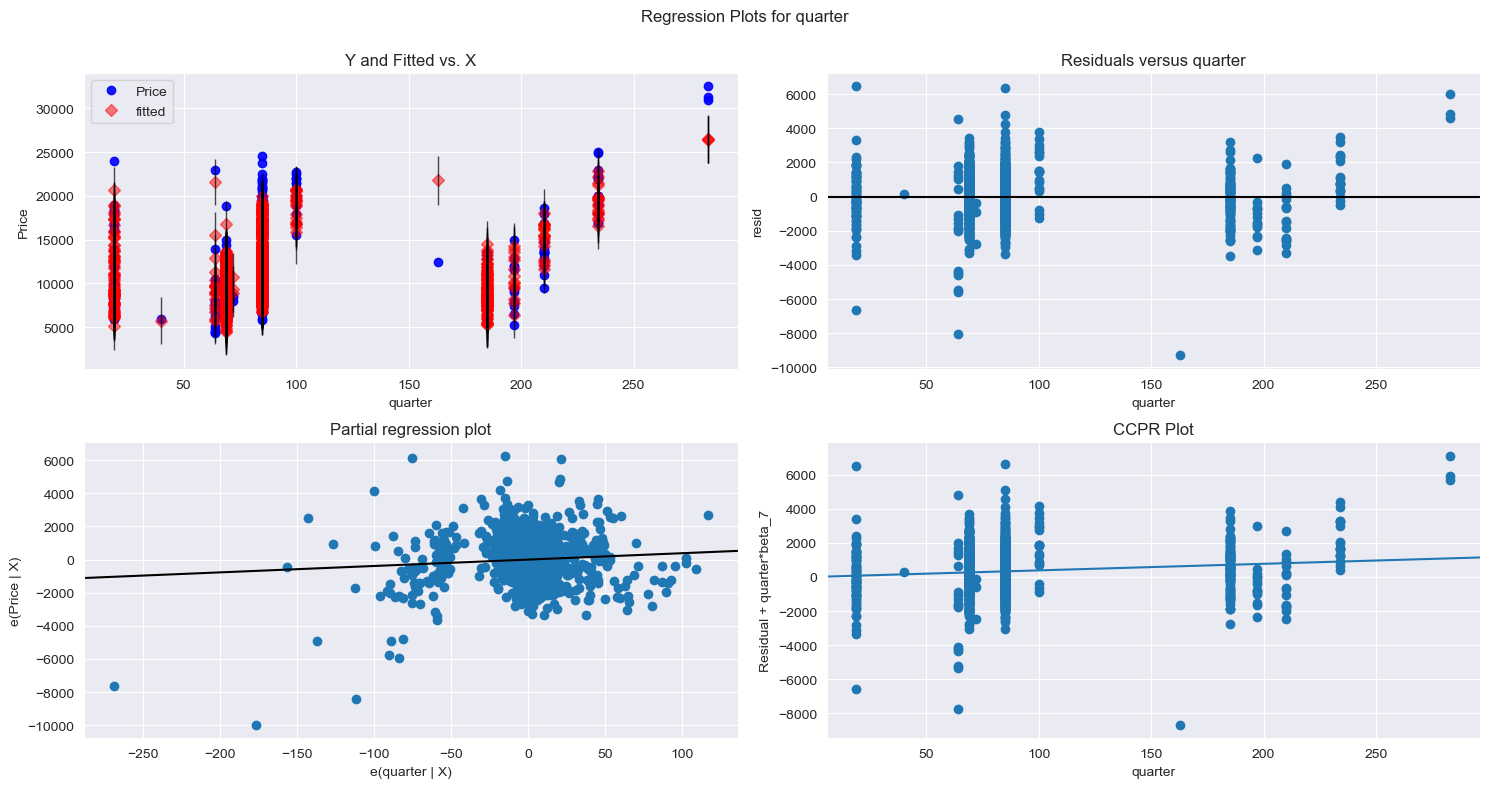

In [31]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "quarter", fig=fig)
plt.show()

eval_env: 1


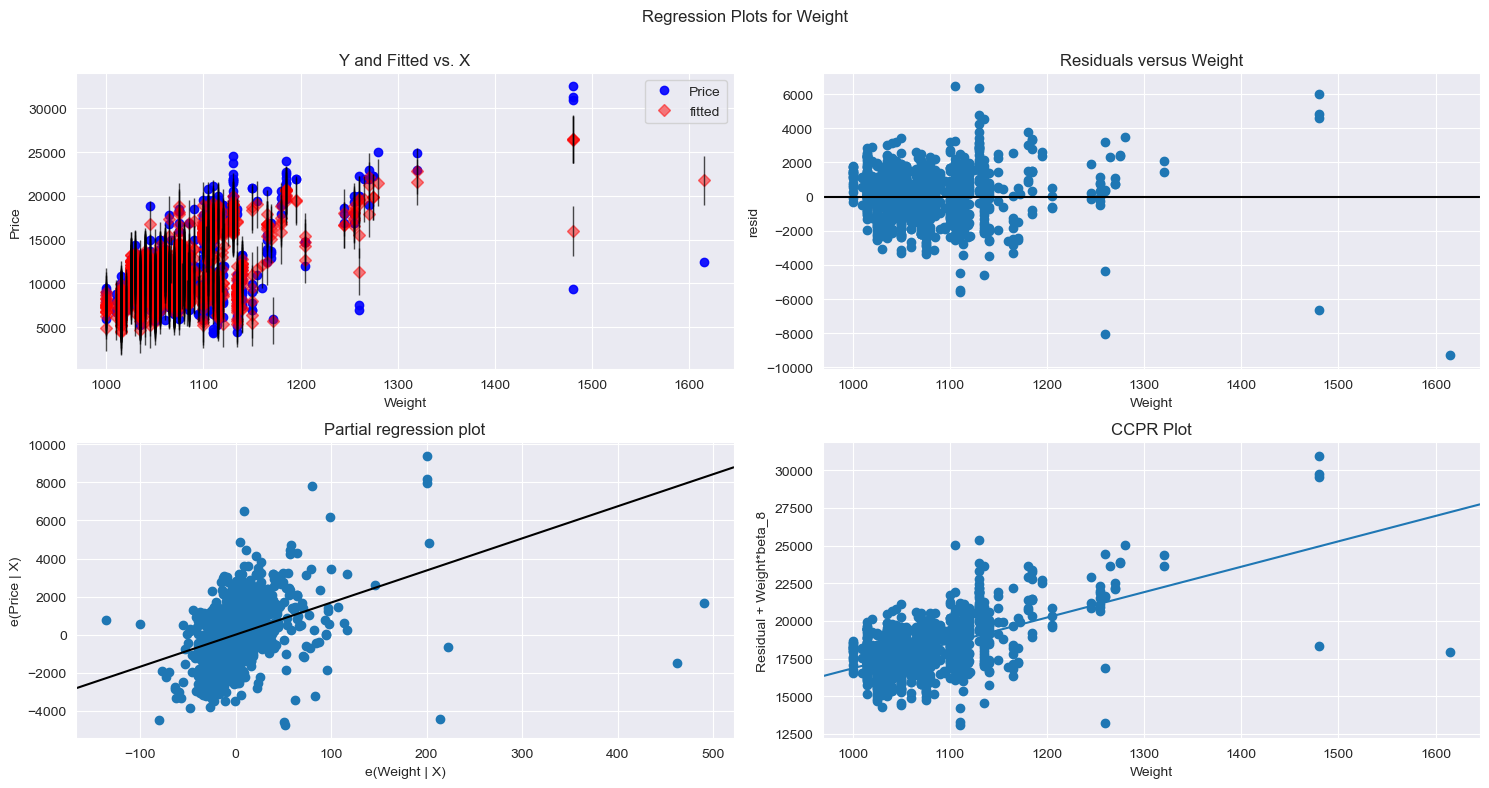

In [32]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

### Model deletion diagnostics

### Deletion of influencers/outliers

### Cook's distance

In [33]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

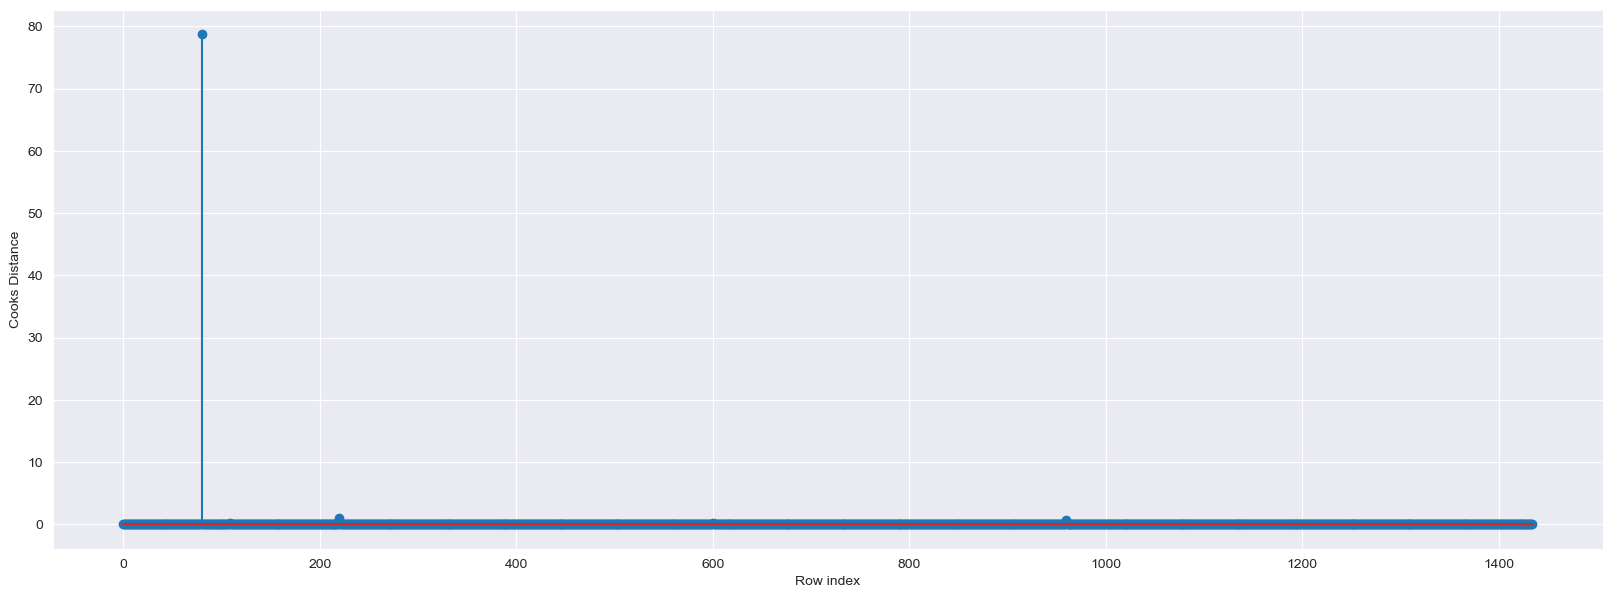

In [34]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyo1)), np.round(c, 5))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [35]:
(np.argmax(c),np.max(c))

(80, 78.72950582248198)

### High influence points

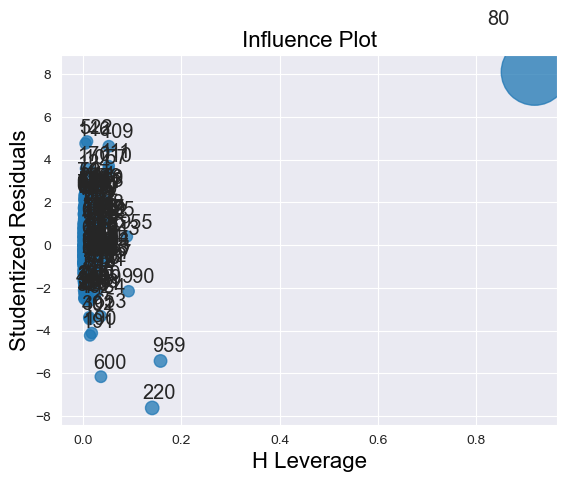

In [36]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [37]:
k =toyo1.shape[1]
n = toyo1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff 

0.020905923344947737

### Improving model

In [38]:
toyo1[toyo1.index.isin([80])]

,Price,age,KM,HP,cc,Doors,Gears,quarter,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [39]:
toyo2=toyo1.drop(toyo1.index[[80]],axis=0).reset_index()
toyo2.head(85)

,index,Price,age,KM,HP,cc,Doors,Gears,quarter,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
80,81,17250,29,20000,110,1600,5,5,85,1115
81,82,15450,25,17003,97,1400,5,5,85,1110
82,83,17950,31,16238,110,1600,5,5,100,1180
83,84,16650,25,15414,97,1400,5,5,85,1110


In [40]:
toyo2=toyo2.drop(['index'],axis=1)
toyo2

,Price,age,KM,HP,cc,Doors,Gears,quarter,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


### Build model on new data

In [41]:
import statsmodels.formula.api as smf
model1=smf.ols('Price~age+KM+HP+cc+Doors+Gears+quarter+Weight',data=toyo2).fit()

In [42]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1172.
Date:                Sun, 25 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:33:05   Log-Likelihood:                -12326.
No. Observations:                1434   AIC:                         2.467e+04
Df Residuals:                    1425   BIC:                         2.472e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6197.9334   1383.989     -4.478      0.000   -8912.808   -3483.059
age         -120.5074      2.561    -47.048      0.000    -125.532    -115.483
KM            -0.0178      0.001    -13.931      0.000      -0.020      -0.015
HP            39.2245      2.912     13.470      0.000      33.512      44.937
cc            -2.5088      0.307     -8.162      0.000      -3.112      -1.906
Doors        -26.5129     39.235     -0.676      0.499    -103.478      50.452
Gears        527.1292    192.832      2.734      0.006     148.864     905.395
quarter        8.9414      1.427      6.268      0.000       6.143      11.740
Weight        20.0627      1.118     17.944      0.000      17.869      22.256
==============================================================================
Omnibus:                      242.181   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2635.168
Skew:                          -0.427   Prob(JB):                         0.00
Kurtosis:                       9.586   Cond. No.                     3.14e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
model_influence = model1.get_influence()
(c, _) = model_influence.cooks_distance

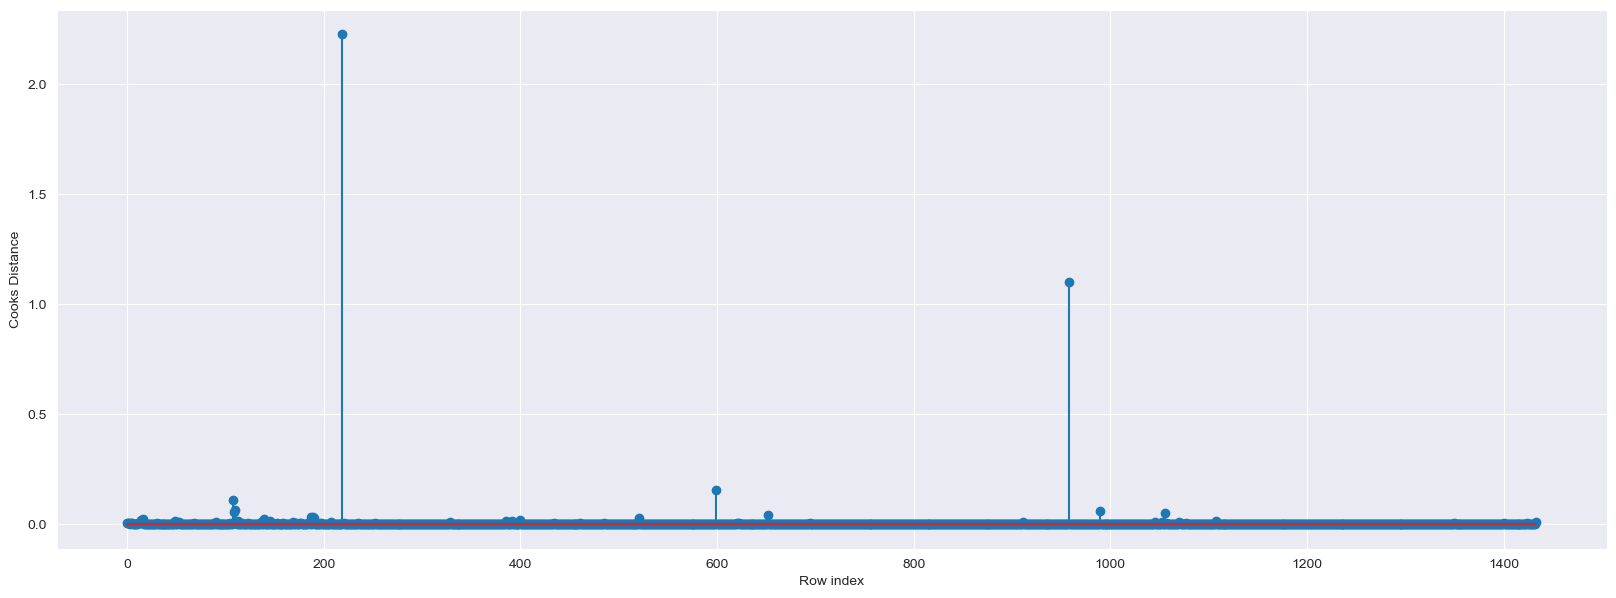

In [44]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyo2)), np.round(c, 5))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [45]:
(np.argmax(c),np.max(c))

(219, 2.2253513655271937)

In [46]:
toyo3=toyo2.drop(toyo2.index[[219]],axis=0).reset_index()

In [47]:
toyo3=toyo3.drop(['index'],axis=1)
toyo3

,Price,age,KM,HP,cc,Doors,Gears,quarter,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


### Build model on new data

In [48]:
import statsmodels.formula.api as smf
model2=smf.ols('Price~age+KM+HP+cc+Doors+Gears+quarter+Weight',data=toyo3).fit()

In [49]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     1264.
Date:                Sun, 25 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:33:15   Log-Likelihood:                -12270.
No. Observations:                1433   AIC:                         2.456e+04
Df Residuals:                    1424   BIC:                         2.461e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.018e+04   1398.103     -7.279      0.000   -1.29e+04   -7433.579
age         -116.6301      2.509    -46.483      0.000    -121.552    -111.708
KM            -0.0172      0.001    -13.935      0.000      -0.020      -0.015
HP            39.2081      2.818     13.916      0.000      33.681      44.735
cc            -3.1922      0.305    -10.455      0.000      -3.791      -2.593
Doors        -64.7218     38.159     -1.696      0.090    -139.577      10.133
Gears        487.4310    186.626      2.612      0.009     121.340     853.522
quarter        7.8987      1.384      5.706      0.000       5.183      10.614
Weight        24.9584      1.189     20.983      0.000      22.625      27.292
==============================================================================
Omnibus:                      195.629   Durbin-Watson:                   1.639
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1736.249
Skew:                          -0.308   Prob(JB):                         0.00
Kurtosis:                       8.357   Cond. No.                     3.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
model2.rsquared

0.8765926307402282

In [51]:
model_influence = model2.get_influence()
(c, _) = model_influence.cooks_distance

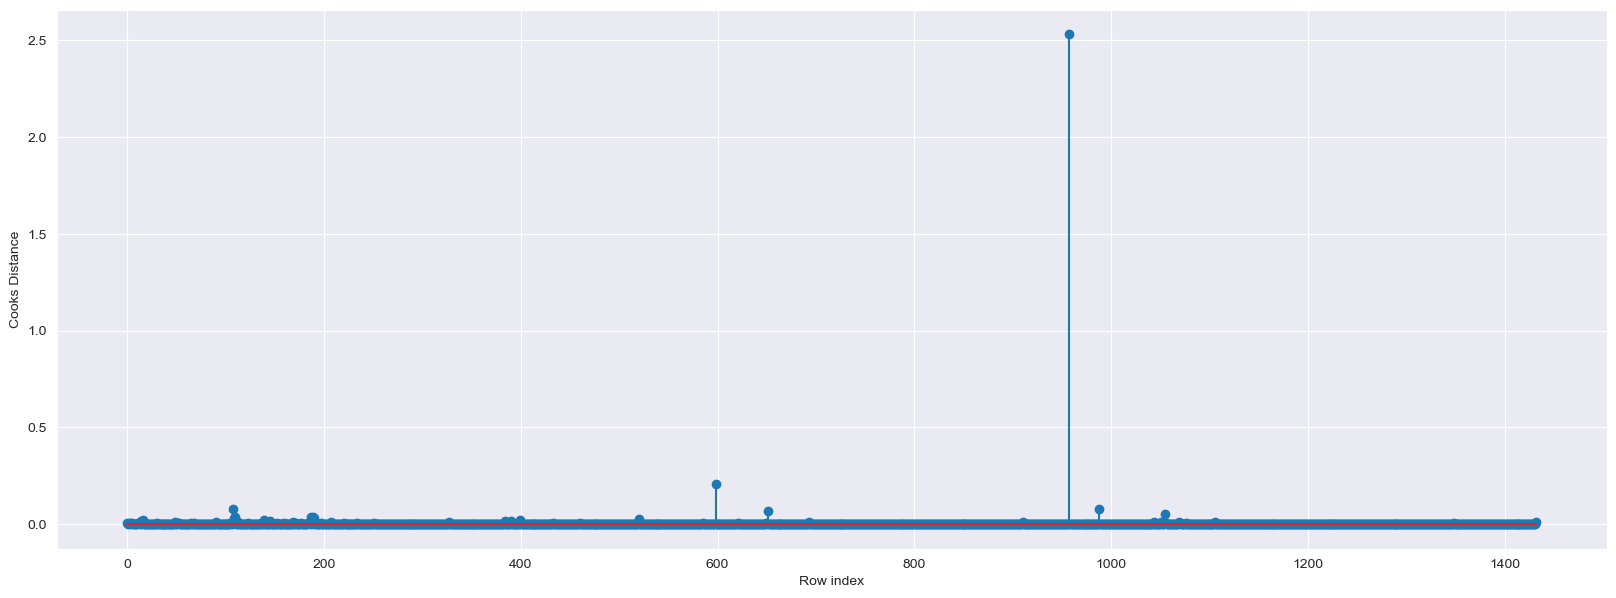

In [52]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyo3)), np.round(c, 5))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [53]:
(np.argmax(c),np.max(c))

(957, 2.530779623276658)

In [54]:
toyo4=toyo3.drop(toyo3.index[[957]],axis=0).reset_index()

In [55]:
toyo4=toyo4.drop(['index'],axis=1)
toyo4

,Price,age,KM,HP,cc,Doors,Gears,quarter,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1427,7500,69,20544,86,1300,3,5,69,1025
1428,10845,72,19000,86,1300,3,5,69,1015
1429,8500,71,17016,86,1300,3,5,69,1015
1430,7250,70,16916,86,1300,3,5,69,1015


### Build model on new data

In [56]:
import statsmodels.formula.api as smf
model3=smf.ols('Price~age+KM+HP+cc+Doors+Gears+quarter+Weight',data=toyo4).fit()

In [57]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1355.
Date:                Sun, 25 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:33:25   Log-Likelihood:                -12218.
No. Observations:                1432   AIC:                         2.445e+04
Df Residuals:                    1423   BIC:                         2.450e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.468e+04   1436.358    -10.222      0.000   -1.75e+04   -1.19e+04
age         -112.0629      2.481    -45.176      0.000    -116.929    -107.197
KM            -0.0170      0.001    -14.135      0.000      -0.019      -0.015
HP            36.5587      2.747     13.308      0.000      31.170      41.947
cc            -3.7852      0.303    -12.508      0.000      -4.379      -3.192
Doors       -121.9808     37.498     -3.253      0.001    -195.539     -48.423
Gears        466.6014    181.031      2.577      0.010     111.485     821.718
quarter        5.1754      1.373      3.770      0.000       2.482       7.869
Weight        30.5667      1.295     23.595      0.000      28.025      33.108
==============================================================================
Omnibus:                      121.369   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              700.907
Skew:                          -0.078   Prob(JB):                    6.31e-153
Kurtosis:                       6.424   Cond. No.                     3.46e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
model3.rsquared,model3.rsquared_adj

(0.8839684606741538, 0.8833161400033128)

In [59]:
model_influence = model3.get_influence()
(c, _) = model_influence.cooks_distance

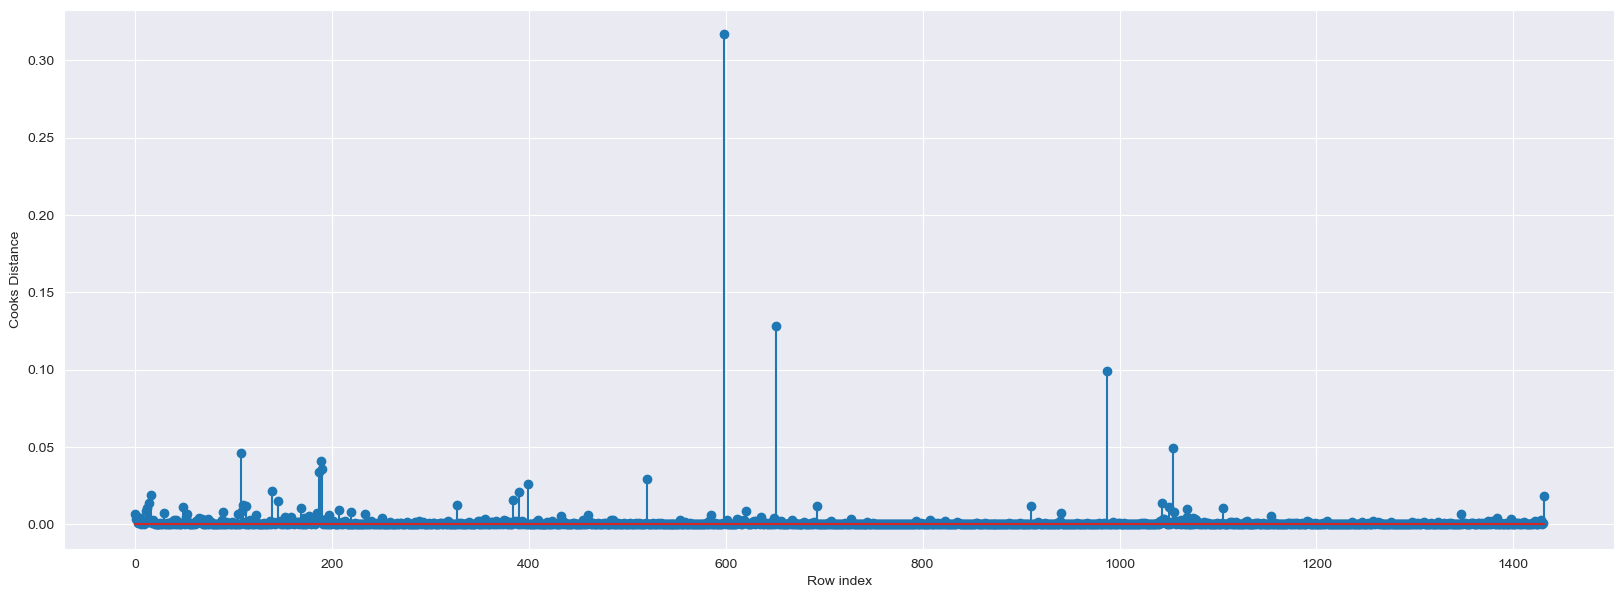

In [60]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyo4)), np.round(c, 5))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [61]:
(np.argmax(c),np.max(c))

(598, 0.31689035401453197)

In [62]:
toyo5=toyo4.drop(toyo4.index[[598]],axis=0).reset_index()

In [63]:
toyo5=toyo5.drop(['index'],axis=1)
toyo5

,Price,age,KM,HP,cc,Doors,Gears,quarter,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1426,7500,69,20544,86,1300,3,5,69,1025
1427,10845,72,19000,86,1300,3,5,69,1015
1428,8500,71,17016,86,1300,3,5,69,1015
1429,7250,70,16916,86,1300,3,5,69,1015


### Build new model

In [64]:
import statsmodels.formula.api as smf
model4=smf.ols('Price~age+KM+HP+cc+Doors+Gears+quarter+Weight',data=toyo5).fit()

In [65]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     1413.
Date:                Sun, 25 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:33:33   Log-Likelihood:                -12182.
No. Observations:                1431   AIC:                         2.438e+04
Df Residuals:                    1422   BIC:                         2.443e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.613e+04   1423.155    -11.333      0.000   -1.89e+04   -1.33e+04
age         -110.3700      2.445    -45.135      0.000    -115.167    -105.573
KM            -0.0177      0.001    -14.951      0.000      -0.020      -0.015
HP            34.2632      2.714     12.625      0.000      28.940      39.587
cc            -3.6790      0.297    -12.372      0.000      -4.262      -3.096
Doors       -143.5437     36.919     -3.888      0.000    -215.965     -71.122
Gears        469.5788    177.682      2.643      0.008     121.033     818.125
quarter        3.6472      1.363      2.676      0.008       0.973       6.321
Weight        32.1321      1.289     24.931      0.000      29.604      34.660
==============================================================================
Omnibus:                       75.132   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.049
Skew:                           0.122   Prob(JB):                     6.82e-56
Kurtosis:                       5.050   Cond. No.                     3.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
model4.rsquared,model4.rsquared_adj

(0.8882395145171204, 0.8876107635439396)

### Predictions for new data

In [69]:
new_data=pd.DataFrame({"age":48,"KM":58745,"HP":92,"cc":1685,"Doors":3,"Gears":5,"quarter":195,"Weight":1240},index=[1])
new_data

,age,KM,HP,cc,Doors,Gears,quarter,Weight
1,48,58745,92,1685,3,5,195,1240


In [70]:
model4.predict(new_data)

1    16960.863925
dtype: float64